# Regression Problem

## Download the data

In [1]:
import os
import tarfile
import urllib

from matplotlib.pyplot import colorbar

In [2]:
# URL for downloading the dataset
download_root = "https://github.com/ageron/handson-ml2/raw/refs/heads/master/"
data_path = os.path.join("datasets", "housing")  # Local directory to store the dataset
data_url = download_root + "datasets/housing/housing.tgz"  # Complete URL to the dataset

In [3]:
#function for download dataset
# Function to download and extract the dataset
def fetch_data(housing_url=data_url, housing_path=data_path):
    os.makedirs(housing_path, exist_ok=True)  # Create directory if it doesn't exist
    tgz_path = os.path.join(housing_path, "housing.tgz")  # Path to save the .tgz file
    urllib.request.urlretrieve(housing_url, tgz_path)  # Download the .tgz file
    housing_tgz = tarfile.open(tgz_path)  # Open the .tgz file
    housing_tgz.extractall(housing_path)  # Extract its contents
    housing_tgz.close()  # Close the file

# Fetch the dataset
fetch_data()

In [3]:
# Now load the data using pandas
import pandas as pd
def load_data(path=data_path):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)

## Take a Quick look at the data structure

In [4]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
try:
    housing_data = load_data()  # Load the data
    print(housing_data.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("The file housing.csv was not found in the specified directory.")
except Exception as e:
    print(f"An error occurred: {e}")

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Notice that the **total_bedrooms** attribute has 207 missing values.

In [6]:
housing.shape

(20640, 10)

In [7]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Statistical analysis

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# PLOT

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

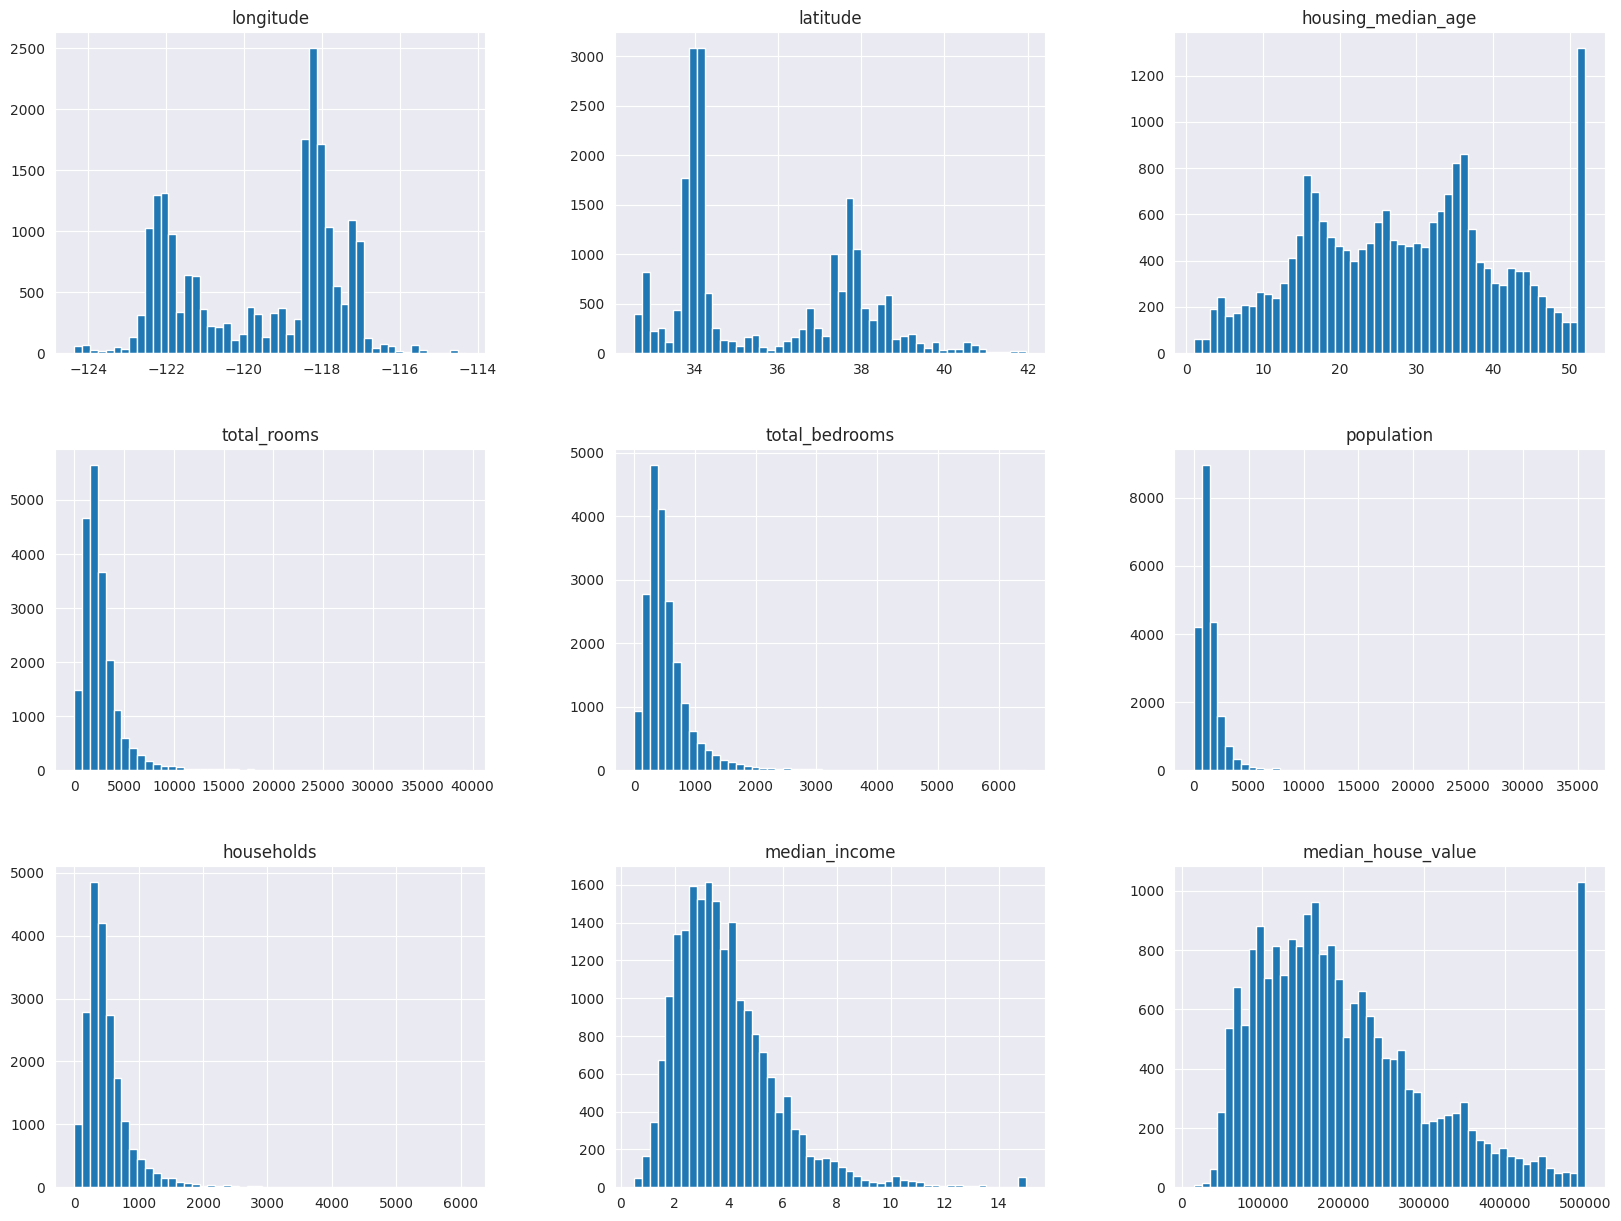

In [10]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Note: Before we look at the data any further, you need to create a test set,put it aside and never look at it.

# Create a Test data

Note :  It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right?

This is true, but our brain is an amazing pattern detection system, which means this is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. 

create a test set is theoretically simple: pick some instances randomly, typically 20% of the dataset (size depends on the size of the dataset).

**Methods for creating Test data**

We have 2 methods for in Machine learning to split datasets into training and testing sets.

1. train_test_split
2. StratifiedShuffleSplit

1.**train_test_split:**
    <li>**Functionality:** It is simple function in **scikit-learn** that randomly splits the data into training and testing sets.</li>
    
2.**StratifiedShuffleSplit:**
    <li>**Functionality:** It is a cross-validation in **scikit-learn** that splits the data while preserving the relative class proportions.</li>

In [11]:
import numpy as np

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.0, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5])

<Axes: >

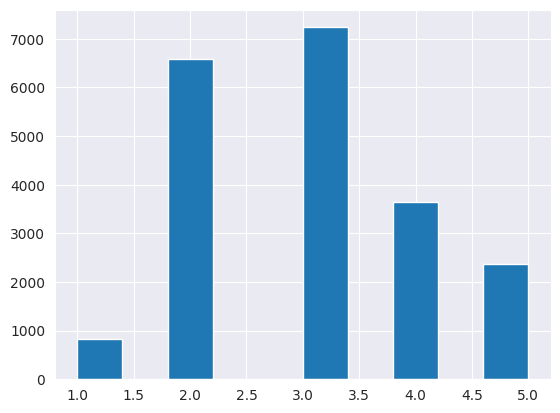

In [13]:
housing["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set  = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# EDA

In [16]:
housing = strat_train_set.copy()

In [17]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Notice We have 158 missing values in total_bedrooms

**Check duplicates**

In [18]:
housing.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

In [19]:
#check null and datatype

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [20]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


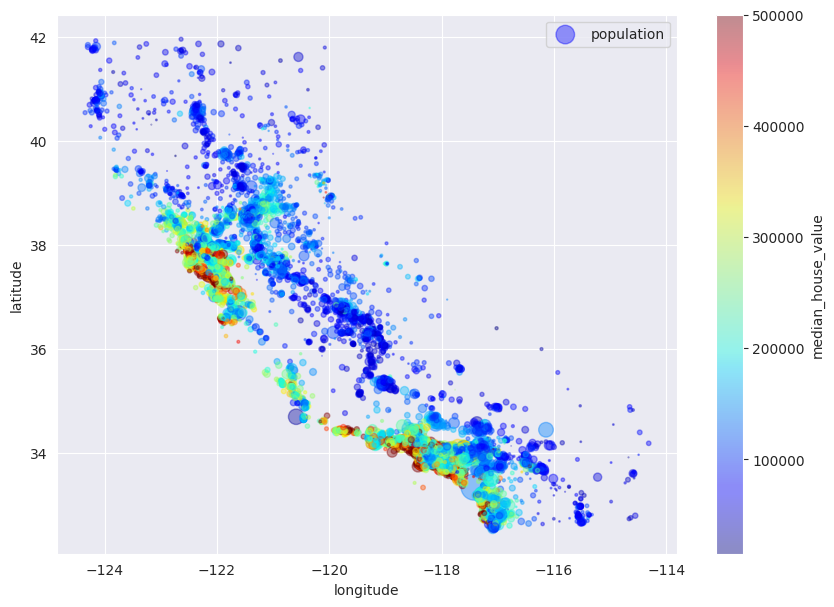

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [22]:
# define numerical & categorical columns

numeric_features = [feature for feature in housing.columns if housing[feature].dtype != 'O']
categorical_features = [feature for feature in housing.columns if housing[feature].dtype == 'O']

In [23]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 9 numerical features : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

We have 1 categorical features : ['ocean_proximity']


# Check outliers

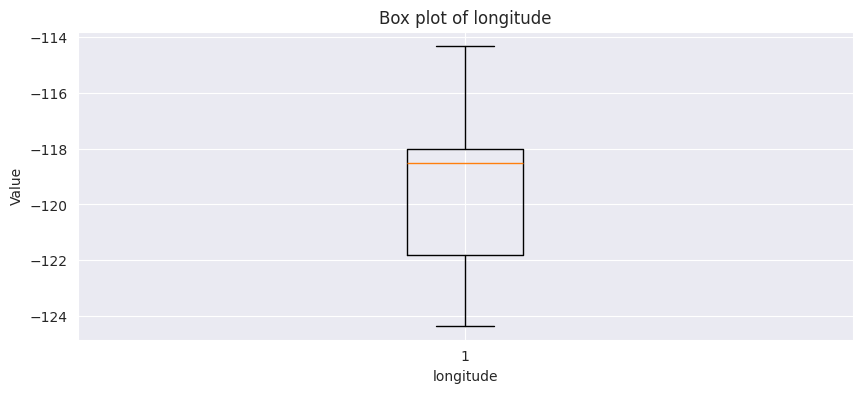

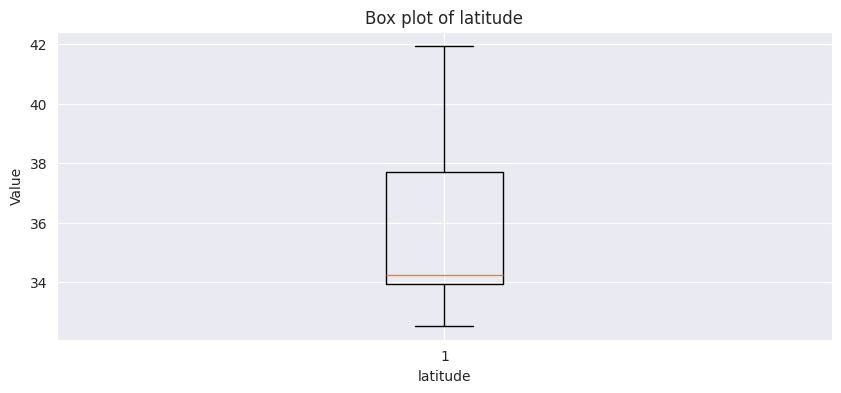

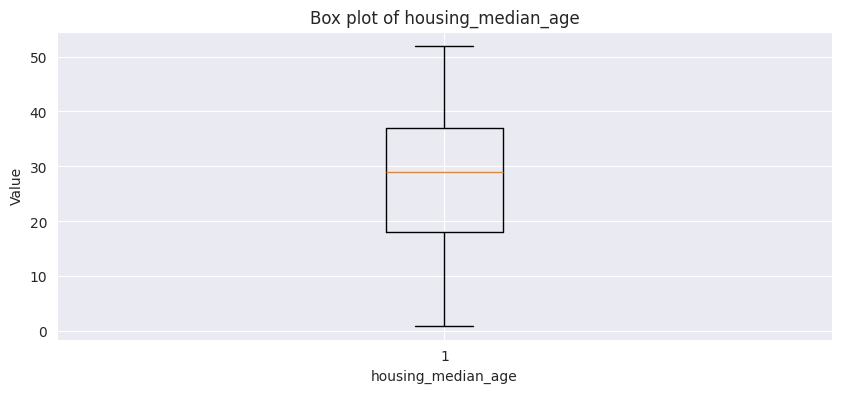

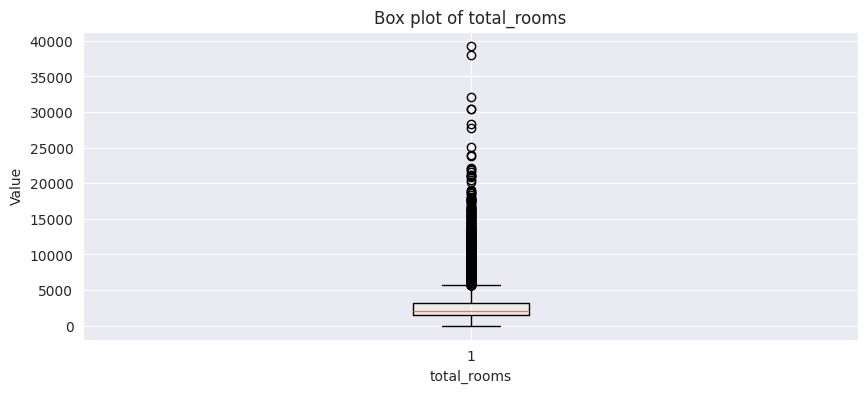

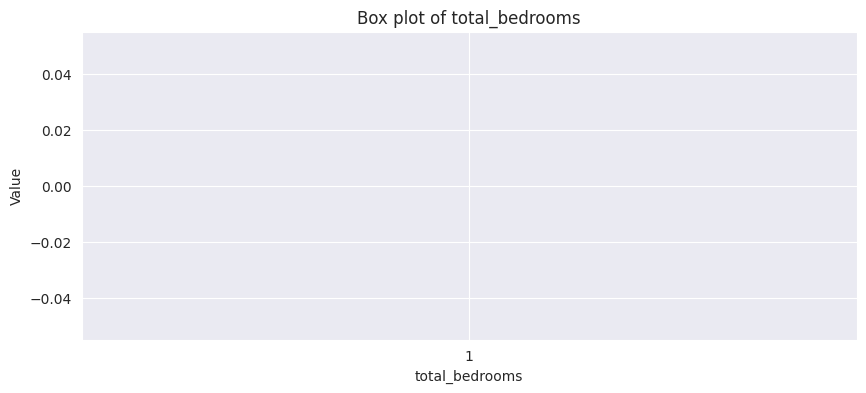

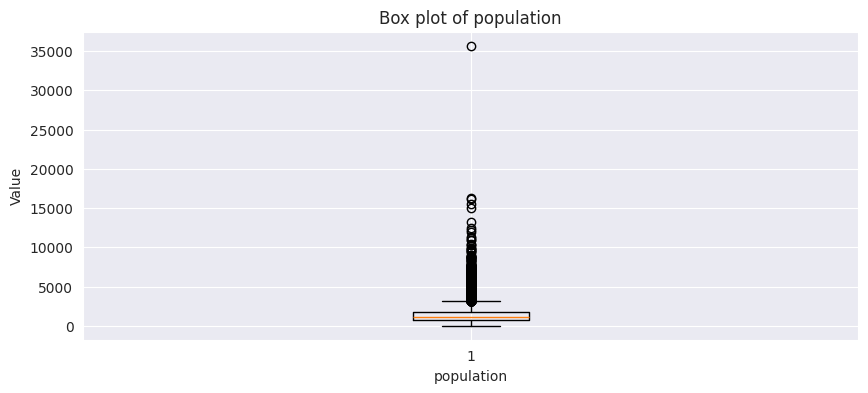

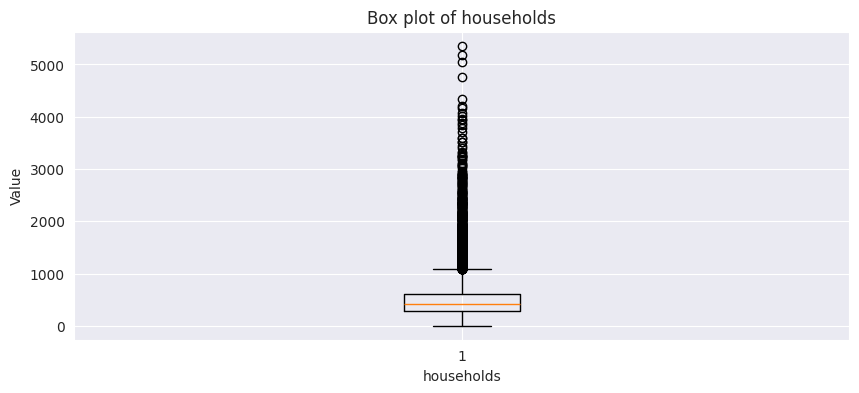

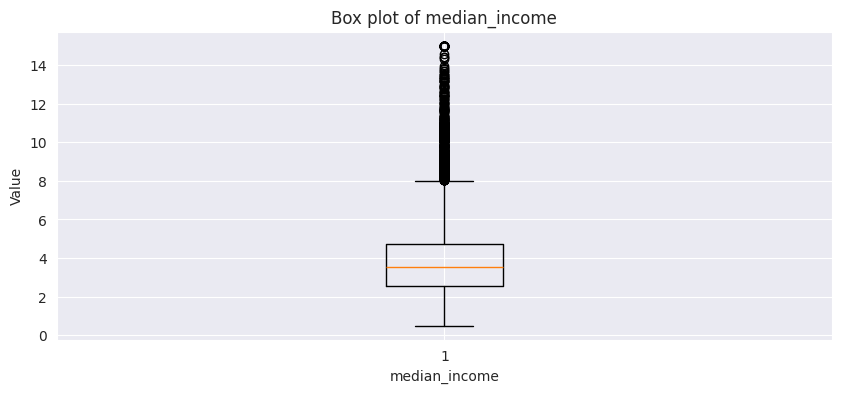

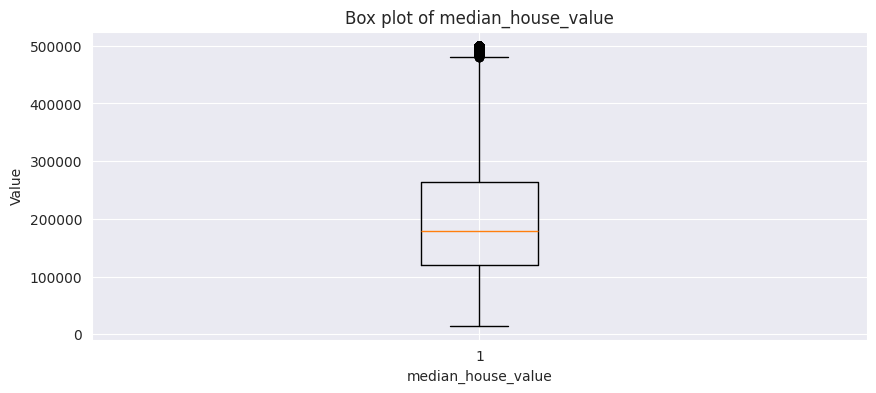

In [24]:
# Create box plots for each numeric feature to identify outliers
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    plt.boxplot(housing[feature])
    plt.title(f'Box plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.show()

**IQR**

In [38]:
# Function to identify outliers using IQR
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound, (data < lower_bound) | (data > upper_bound)

# Initialize a dictionary to store the count of outliers for each feature along with bounds
outlier_info = {}

# Check for outliers in each numeric feature
for feature in numeric_features:
    lower_bound, upper_bound, outliers = identify_outliers_iqr(housing[feature])
    outlier_count = outliers.sum()  # Count the number of outliers
    outlier_info[feature] = {
        "count": outlier_count,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
    
    
# Display the total number of outliers, upper and lower bounds for each feature
print("Total number of outliers in each numeric feature along with bounds:")
for feature, info in outlier_info.items():
    print(f"{feature}: Count = {info['count']}, Lower Bound = {info['lower_bound']}, Upper Bound = {info['upper_bound']}")


Total number of outliers in each numeric feature along with bounds:
longitude: Count = 0, Lower Bound = -127.48499999999999, Upper Bound = -112.32500000000002
latitude: Count = 0, Lower Bound = 28.269999999999996, Upper Bound = 43.39
housing_median_age: Count = 0, Lower Bound = -10.5, Upper Bound = 65.5
total_rooms: Count = 1015, Lower Bound = -1104.0, Upper Bound = 5688.0
total_bedrooms: Count = 1019, Lower Bound = -228.5, Upper Bound = 1167.5
population: Count = 962, Lower Bound = -618.5, Upper Bound = 3121.5
households: Count = 983, Lower Bound = -205.5, Upper Bound = 1086.5
median_income: Count = 553, Lower Bound = -0.7006124999999996, Upper Bound = 8.0128875
median_house_value: Count = 882, Lower Bound = -96350.0, Upper Bound = 480050.0


# categorical

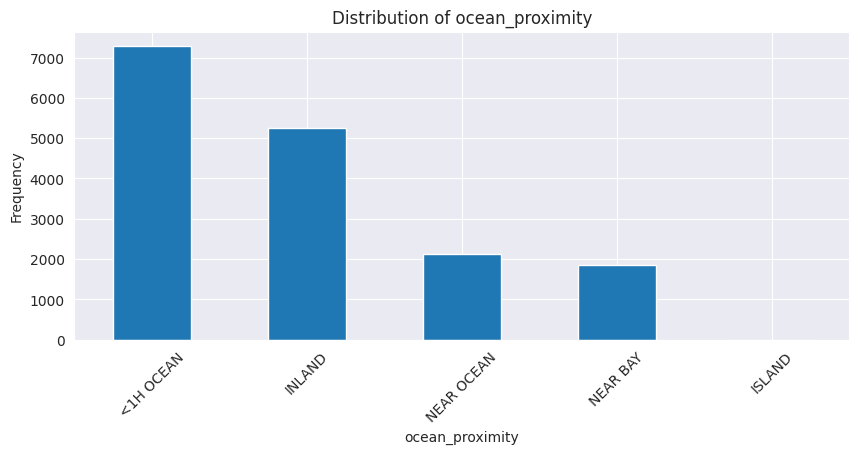

In [25]:
import matplotlib.pyplot as plt

# Visualize categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    housing[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


# correlations

In [26]:
corr_matrix = housing.corr(numeric_only =True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


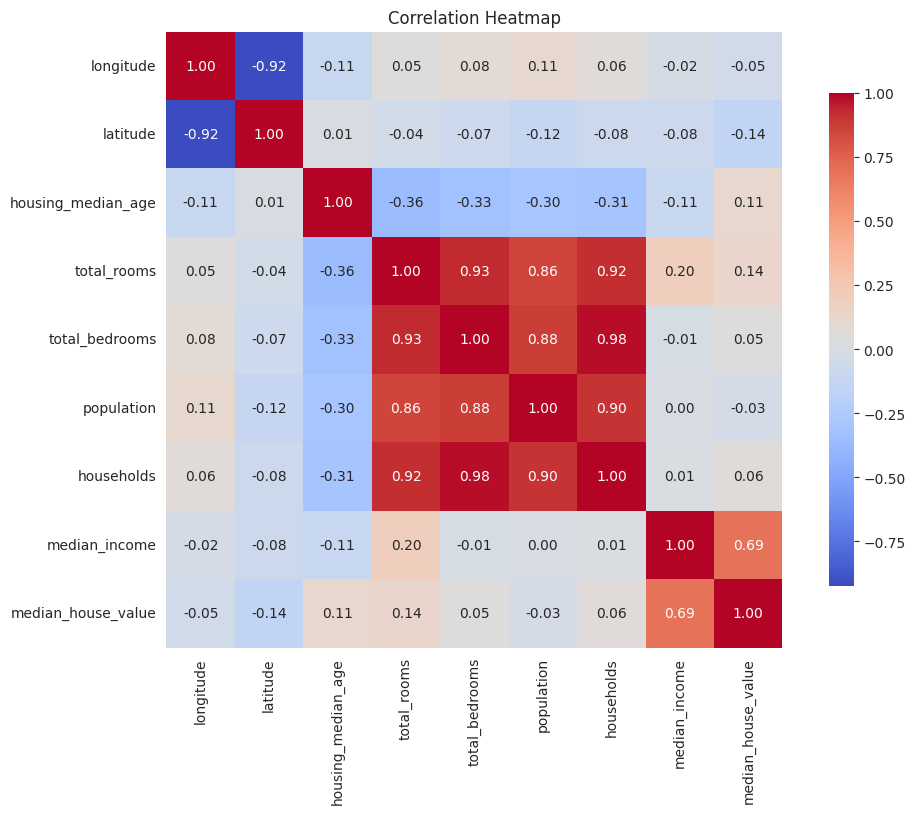

In [27]:
import seaborn as sns
correlation_matrix = housing.corr(numeric_only = True)


plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

**Considerations Before Removing Outliers**

    1.Domain Knowledge: Understand the context of the data. Sometimes what appears to be an outlier may be a valid extreme case.
    2.Impact on Analysis: Assess how removing outliers affects your analysis or model performance. It may be beneficial to try models with and without outliers to compare results.
    3.Visual Confirmation: Before and after removing outliers, visualize the data (e.g., using box plots or scatter plots) to understand how the data distribution changes.

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Experimenting with Attribute Combinations

In [29]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

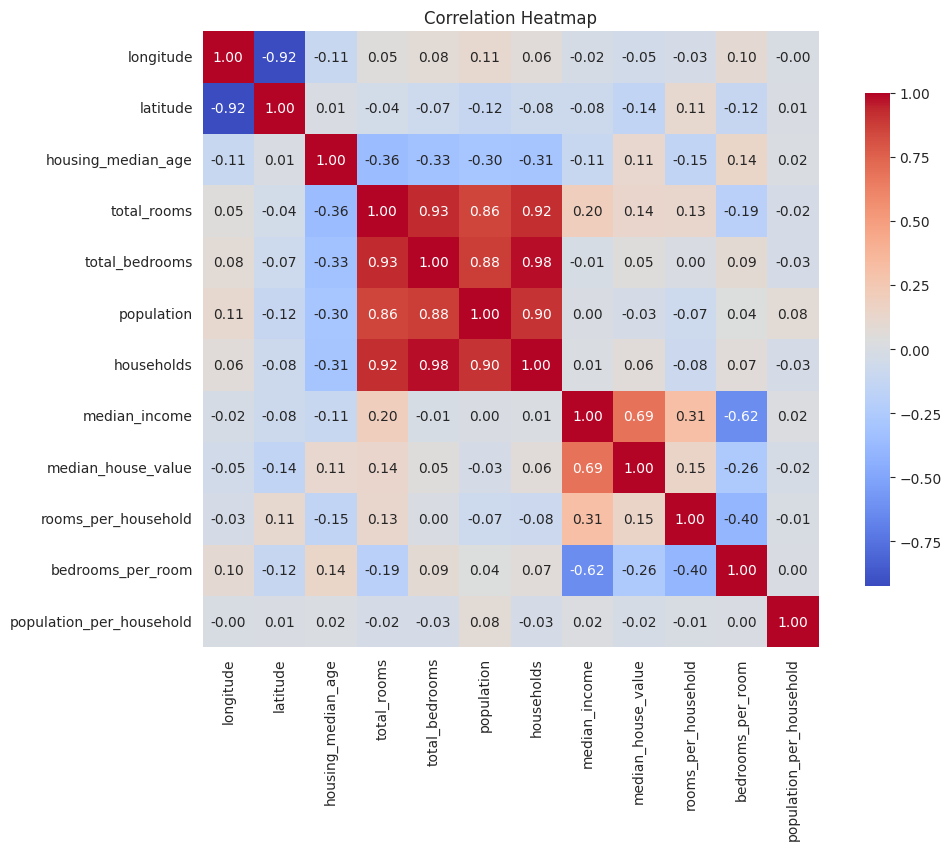

In [30]:
correlation_matrix = housing.corr(numeric_only = True)
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [35]:
correlation_matrix = housing.corr(numeric_only = True)
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

**Let's revert to a clean training set**

In [37]:
housing_labels  = strat_train_set["median_house_value"].copy()
housing = strat_train_set.drop("median_house_value", axis=1)

# Data Cleaning

Most ML algorithms cannot work with missing features, so let's create a few functions to take care of them. As, we saw earlier that the total_bedrooms attribute has some missing values, so let's fix this. We have three options:

    1.Get rid of the corresponding districts.
    2.Get rid of the whole attributes.
    3. Set the values to some value(zero,the mean, median)etc.
    